In [0]:
import numpy as np
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.merge import concatenate


In [0]:
N = 10000
input_dim = 32
attention_column = 1

In [0]:
def get_data(n, input_dim, attention_column=1):
    x = np.random.standard_normal(size=(n, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column] = y[:, 0]
    return x, y


In [0]:
def get_data_recurrent(n, timesteps, input_dim, attention_column=10):
    x = np.random.standard_normal(size=(n, timesteps, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column, :] = np.tile(y[:], (1, input_dim))
    return x, y

In [0]:
def get_activations(model, inputs, print_shape_only=False, layer_name=None):
  print("----------- activations -----------------")
  activations = []
  inp = model.input
  outputs = [layer.output for layer in model.layers]
  if layer_name is None:
    outputs = [layer.output for layer in model.layers]
  else:
    outputs = [layer.output for layer in model.layers if layer.name == layer_name]
  funcs = [K.function([inp] + [K.learning_phase()], [out]) for out in outputs]
  layer_outputs = [func([inputs, 1.])[0] for func in funcs]
  for layer_activations in layer_outputs:
    activations.append(layer_activations)
    if print_shape_only:
      print(layer_activations.shape)
    else:
      print(layer_activations)
  return activations

In [0]:
inputs_1, outputs = get_data(N, input_dim)

In [36]:
inputs = Input(shape=(input_dim,))

# attention part starts here
attention_probs = Dense(input_dim, activation='softmax', name='attention_vec')(inputs)
attention_mul = concatenate([inputs, attention_probs])
# attention part ends here

attention_mul = Dense(64)(attention_mul)

output = Dense(1, activation="sigmoid")(attention_mul)

model = Model(input=[inputs], output=output)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
attention_vec (Dense)           (None, 32)           1056        input_14[0][0]                   
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 64)           0           input_14[0][0]                   
                                                                 attention_vec[0][0]              
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 64)           4160        concatenate_7[0][0]              
__________

In [39]:
model.fit([inputs_1], outputs, epochs=20, batch_size=64, validation_split=0.5)

Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 3s 571us/step - loss: 0.6763 - acc: 0.6462 - val_loss: 0.5363 - val_acc: 0.9328
Epoch 2/20
5000/5000 [==============================] - 1s 109us/step - loss: 0.4293 - acc: 0.9848 - val_loss: 0.3261 - val_acc: 1.0000
Epoch 3/20
5000/5000 [==============================] - 1s 111us/step - loss: 0.2380 - acc: 1.0000 - val_loss: 0.1646 - val_acc: 1.0000
Epoch 4/20
5000/5000 [==============================] - 1s 110us/step - loss: 0.1155 - acc: 1.0000 - val_loss: 0.0797 - val_acc: 1.0000
Epoch 5/20
5000/5000 [==============================] - 1s 116us/step - loss: 0.0576 - acc: 1.0000 - val_loss: 0.0430 - val_acc: 1.0000
Epoch 6/20
5000/5000 [==============================] - 1s 114us/step - loss: 0.0322 - acc: 1.0000 - val_loss: 0.0259 - val_acc: 1.0000
Epoch 7/20
5000/5000 [==============================] - 1s 116us/step - loss: 0.0200 - acc: 1.0000 - val_loss: 0.0171 - val_acc: 1.0000


In [0]:
testing_inputs_1, testing_outputs = get_data(1, input_dim)

In [44]:
# Attention vector corresponds to the second matrix.
# The first one is the Inputs output.
attention_vector = get_activations(model, testing_inputs_1,
                                   print_shape_only=True,
                                   layer_name='attention_vec')[0].flatten()
print('attention =', attention_vector)

----------- activations -----------------
(1, 32)
attention = [0.03296177 0.01292069 0.00840517 0.03135223 0.15153264 0.01131308
 0.03489395 0.01646125 0.01261883 0.02052007 0.00861703 0.02439288
 0.02439462 0.05863256 0.01937476 0.00638512 0.01794702 0.00882623
 0.02920609 0.02818276 0.03520534 0.01625181 0.01444596 0.02960802
 0.1939219  0.06702933 0.0057255  0.01346897 0.01491135 0.0206208
 0.00990619 0.01996608]


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

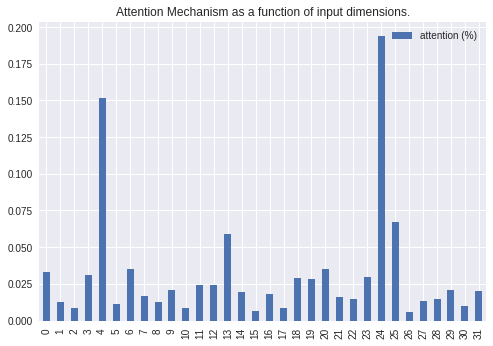

In [46]:
pd.DataFrame(attention_vector, columns=['attention (%)']).plot(kind='bar', title='Attention Mechanism as a function of input dimensions.')